# EXPECTATIVA DE VIDA(OMS)
*Uma breve análise de correlações entre fatores socioeconômicos.*

## Nome dos integrantes
**Bergson Gabriel da Silva Oliveira Melo, Lucas de Medeiros Linhares Gomes, Davi Cavalcanti de Mello.**

# INTRODUÇÃO

## Sobre o dataset 
O repositório de dados do Global Health Observatory (GHO) sob a Organização Mundial da Saúde (OMS) acompanha o estado da saúde, bem como muitos outros fatores relacionados para 193 países. Os conjuntos de dados são disponibilizados ao público para fins de contribuições através de análise de dados. Coletado do mesmo site de repositório de dados da OMS e seus dados econômicos correspondentes foram coletados do site das Nações Unidas. Entre todas as categorias de fatores relacionados à saúde, foram escolhidos apenas os fatores críticos que são mais representativos. Observou-se que nos últimos 15 anos houve um grande desenvolvimento no setor de saúde, resultando na melhoria das taxas de mortalidade humana, especialmente nas nações em desenvolvimento, em comparação com os últimos 30 anos. Portanto, neste dataset são considerado dados do ano 2000-2015. Os arquivos de dados individuais foram mesclados em um único conjunto de dados. O arquivo mesclado final (conjunto de dados final) consiste em 22 colunas e 2.938 linhas, o que significa 20 variáveis de previsão. Todas as variáveis de previsão foram então divididas em várias categorias amplas: fatores relacionados à imunização, fatores de mortalidade, fatores econômicos e fatores sociais.
## Objetivos da análise
Dado o diverso escopo de possibilidades de possíveis correlações entre as variáveis de previsão, decidimos nos concentrar em 5 perguntas chaves no qual julgamos interessantes para determinar alguns fatores socioeconômicos.

- *Qual a relação existente entre o consumo de álcool e a expectativa de vida?*
- *Países com maior escolaridade possuem maior expetativa de vida?*
- *Existe uma relação entre o PIB per capita e os gastos governamentais com saúde?*
- *Existe relação entre escolaridade e gastos pessoais com saúde?*
- *Existe relação entre escolaridade e consumo de álcool?*







# EXPLORAÇÃO INICIAL DOS DADOS

## 1.Datasets utilizados


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df_dados = pd.read_csv("Life Expectancy Data.csv")

Nem todas as colunas possuíam dados relevantes na análise desenvolvida, portanto as mais importantes foram selecionadas na cécula abaixo.

In [3]:
colunas_selecionadas = ["Country", "Year", "Status", "Life expectancy ", "infant deaths", "Alcohol", "percentage expenditure", "GDP", "Hepatitis B",
                     " BMI ", "under-five deaths ", "Polio", "Total expenditure", "Diphtheria ", " HIV/AIDS",
                     " thinness  1-19 years", " thinness 5-9 years", "Income composition of resources",
                     "Schooling"]
df_dados = df_dados[colunas_selecionadas]

Para trabalhar com medidas como centralidade, dispersão e correlação, faz-se necessário que os dados sejam numéricos. O dataframe "df_dados_numericos" possui apenas colunas com dados numéricos.

In [4]:
df_dados_numericos = df_dados[["Life expectancy ", "infant deaths", "Alcohol", "percentage expenditure", "GDP", "Hepatitis B",
                     " BMI ", "under-five deaths ", "Polio", "Total expenditure", "Diphtheria ", " HIV/AIDS",
                     " thinness  1-19 years", " thinness 5-9 years", "Income composition of resources",
                     "Schooling"]]

Como o dataframe possui dados do ano 2000 até o ano 2015, escolhemos um ano para realizar uma análise baseada nele. Isso deixa a visualização e correlação dos dados mais clara e precisa. O ano escolhido foi 2012, por ser o ano com a menor quantidade de dados em falta.

In [5]:
df_dados2012 = df_dados[df_dados["Year"] == 2012]

Para evitar dados incorretos (por eventuais erros de digitação do arquivo csv), utilizamos essas máscaras nas seguintes variáveis: 

In [6]:
df_dados2012 = df_dados2012[df_dados2012["Income composition of resources"] > 0]
df_dados2012 = df_dados2012[df_dados2012["Schooling"] > 0]
df_dados2012 = df_dados2012[df_dados2012["infant deaths"] < 900]
df_dados2012 = df_dados2012[df_dados2012["under-five deaths "] < 900]
df_dados2012 = df_dados2012[df_dados2012["GDP"] > 0]

Para o funcionamento do algoritmo KMeans, não podem haver valores NaN. Para não compremeter outras análises, foram feitos dataframes específicos retirando os valores NaN de algumas colunas.

In [7]:
df_alcool = df_dados2012.dropna(subset=["Alcohol"])
df_BMI = df_dados2012.dropna(subset=[" BMI "])

## 2. Centralidade das variáveis

In [8]:
def central(dfcoluna: pd.Series) -> dict[str, float]:
    media = dfcoluna.mean()
    mediana = dfcoluna.median()
    moda = dfcoluna.mode().squeeze() 
    
    return {"Média": media, "Mediana" : mediana, "Moda" : moda}

A função acima foi definida para computar as medidas de centralidade das variáveis do dataset. A função recebe "uma coluna de DataFrame" (Pandas Series) e retorna um dicionário com as medidas de centralidade.

In [9]:
centralidade_das_variaveis = {}

for coluna in df_dados_numericos.drop(["GDP"], axis = 1):   
    dado = df_dados_numericos[coluna]
    centralidade_das_variaveis[coluna] = central(dado)
    
GDP = df_dados_numericos["GDP"]
media_gdp = GDP.mean()
mediana_gdp = GDP.median()
centralidade_das_variaveis["GDP"] = {"Média" : media_gdp, "Mediana" : mediana_gdp}


A função de nome central foi aplicada a todas as colunas do dataset, com exceção de "GDP", visto que não se desejava calcular sua moda. O resultado foi armanezado no dicionário "centralcentralidade_das_variaveis", no qual as keys são os nomes das colunas e os values o resultado retornado da função central.

In [10]:
centralidade_das_variaveis

{'Life expectancy ': {'Média': 69.22493169398912,
  'Mediana': 72.1,
  'Moda': 73.0},
 'infant deaths': {'Média': 30.303948264125257, 'Mediana': 3.0, 'Moda': 0},
 'Alcohol': {'Média': 4.6028607871720375, 'Mediana': 3.755, 'Moda': 0.01},
 'percentage expenditure': {'Média': 738.2512954533823,
  'Mediana': 64.912906045,
  'Moda': 0.0},
 'Hepatitis B': {'Média': 80.94046121593291, 'Mediana': 92.0, 'Moda': 99.0},
 ' BMI ': {'Média': 38.32124655647373, 'Mediana': 43.5, 'Moda': 58.5},
 'under-five deaths ': {'Média': 42.0357385976855, 'Mediana': 4.0, 'Moda': 0},
 'Polio': {'Média': 82.55018842069202, 'Mediana': 93.0, 'Moda': 99.0},
 'Total expenditure': {'Média': 5.9381895280235915,
  'Mediana': 5.755,
  'Moda': 4.6},
 'Diphtheria ': {'Média': 82.32408359027065, 'Mediana': 93.0, 'Moda': 99.0},
 ' HIV/AIDS': {'Média': 1.7421034717494939, 'Mediana': 0.1, 'Moda': 0.1},
 ' thinness  1-19 years': {'Média': 4.8397038567493205,
  'Mediana': 3.3,
  'Moda': 1.0},
 ' thinness 5-9 years': {'Média': 4.8

## 3.Dispersão das variáveis


In [11]:
def dispersao(dfcoluna:pd.Series) -> dict[str,float]:
    variancia = np.var(dfcoluna)
    desvio_p = np.std(dfcoluna) 
    return {"Variância": variancia, "Desvio Padrão" : desvio_p}

Semelhante a função central, foi definida a função dispersao para calcular as medidas de dispersão das variáveis do dataset. A função recebe um objeto pandas Series e retorna um dicionário com os valores de variância e desvio padrão dos dados passados.

In [12]:
dispersao_das_variaveis = {}

for colunas in df_dados_numericos:
    dados2 = df_dados_numericos[colunas]
    dispersao_das_variaveis[colunas] = dispersao(dados2)

A função dispersao foi aplicada a todas as colunas do dataset e os resultados foram armazenados no dicionários dispersao_das_variaveis

In [13]:
dispersao_das_variaveis

{'Life expectancy ': {'Variância': 90.67307376582568,
  'Desvio Padrão': 9.522241005447492},
 'infant deaths': {'Variância': 13901.926335670341,
  'Desvio Padrão': 117.90643042544517},
 'Alcohol': {'Variância': 16.416063645342746,
  'Desvio Padrão': 4.051674178082777},
 'percentage expenditure': {'Variância': 3950460.4161855783,
  'Desvio Padrão': 1987.5765183221447},
 'GDP': {'Variância': 203555950.81344026, 'Desvio Padrão': 14267.303557906107},
 'Hepatitis B': {'Variância': 628.2421574392729,
  'Desvio Padrão': 25.06475927351533},
 ' BMI ': {'Variância': 401.6249308152427,
  'Desvio Padrão': 20.040582097714694},
 'under-five deaths ': {'Variância': 25734.011997089085,
  'Desvio Padrão': 160.4182408490041},
 'Polio': {'Variância': 548.6853022940603,
  'Desvio Padrão': 23.424032579683207},
 'Total expenditure': {'Variância': 6.239299708916882,
  'Desvio Padrão': 2.497859025028611},
 'Diphtheria ': {'Variância': 562.2992178566609,
  'Desvio Padrão': 23.712849214226893},
 ' HIV/AIDS': {'

## 4. Histograma de expectativa de vida

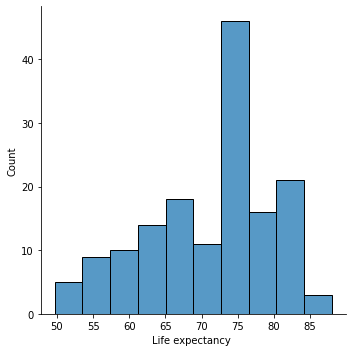

In [14]:
sns.displot(df_dados2012, x = "Life expectancy ", bins = 10)

# FATOR IDH
*Os gráficos abaixo foram feitos com o objetivo de explicar a influência do IDH nos demais fatores e como essa influência foi solucionada.*

In [15]:
def quantidade_k(df:pd.DataFrame, coluna1, coluna2):
    dists = []
    for i in range(1,10):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(df[[coluna1, coluna2]])
        dists.append(kmeans.inertia_)
    sns.lineplot(x = range(1,10), y = dists)

A função acima (quantidade_k) é responsável por iniciar o algoritmo do KMeans. K varia de 1 até 10, e a função calcula as distâncias para cada valor de k. Ao final, é gerado um gráfico de linha com as distâncias de k no eixo Y e a quantidade de k no eixo X. A partir da análise do gráfico é possível escolher o valor de k mais apropriado para fazer o agrupamento. A função recebe um dataframe e o nome das duas colunas que serão agrupadas.

### Agrupamento entre expectativa de vida e IDH

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


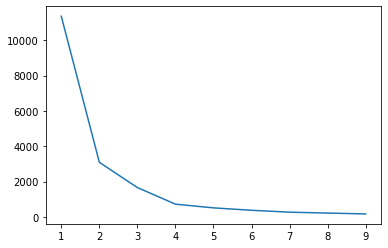

In [16]:
quantidade_k(df_dados2012, "Life expectancy ", "Income composition of resources")

Acima está o gráfico gerado pela função "quantidade_k". A partir dele, escolhemos o valor de k para gerar o gráfico de agrupamento exibido abaixo.

<AxesSubplot:xlabel='Life expectancy ', ylabel='Income composition of resources'>

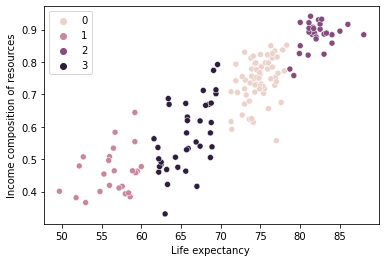

In [17]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_dados2012[["Life expectancy ", "Income composition of resources"]])
sns.scatterplot(data = df_dados2012, x = "Life expectancy ", y = "Income composition of resources", hue = kmeans.labels_)

In [18]:
df_dados2012[["Life expectancy ", "Income composition of resources"]].corr()

,Life expectancy,Income composition of resources
Life expectancy,1.00000,0.90082
Income composition of resources,0.90082,1.00000


O IDH é o fator que mais influencia na expectativa de vida dentre os dados analisados.

### Agrupamento entre consumo de álcool e expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


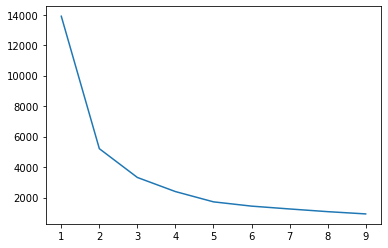

In [19]:
quantidade_k(df_alcool, "Alcohol", "Life expectancy ")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Alcohol'>

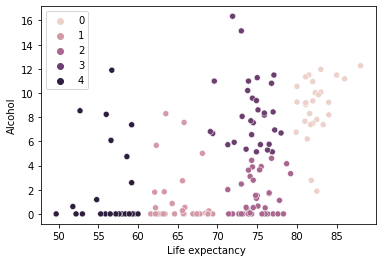

In [20]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df_alcool[["Alcohol", "Life expectancy "]])
sns.scatterplot(data = df_alcool, x = "Life expectancy ", y = "Alcohol", hue = kmeans.labels_)

In [21]:
df_alcool[["Life expectancy ", "Alcohol"]].corr()

,Life expectancy,Alcohol
Life expectancy,1.000000,0.485464
Alcohol,0.485464,1.000000


### Agrupamento entre consumo de álcool e IDH

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


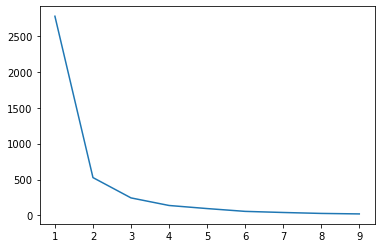

In [22]:
quantidade_k(df_alcool, "Alcohol", "Income composition of resources")

<AxesSubplot:xlabel='Income composition of resources', ylabel='Alcohol'>

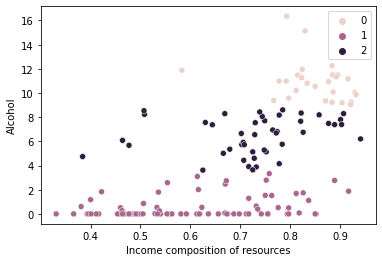

In [23]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_alcool[["Alcohol", "Income composition of resources"]])
sns.scatterplot(data = df_alcool, x = "Income composition of resources", y = "Alcohol", hue = kmeans.labels_)

In [24]:
df_alcool[["Income composition of resources", "Alcohol"]].corr()

,Income composition of resources,Alcohol
Income composition of resources,1.000000,0.601073
Alcohol,0.601073,1.000000


### Agrupamento entre escolaridade e expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


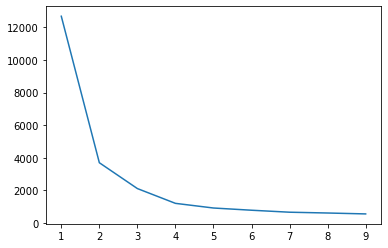

In [25]:
quantidade_k(df_dados2012, "Life expectancy ", "Schooling")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

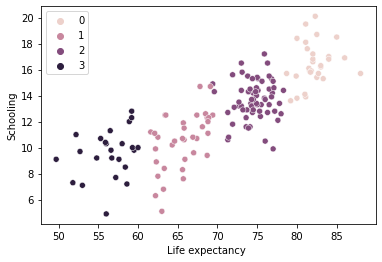

In [26]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_dados2012[["Life expectancy ", "Schooling"]])
sns.scatterplot(data = df_dados2012, x = "Life expectancy ", y = "Schooling", hue = kmeans.labels_)

In [27]:
df_dados2012[["Life expectancy ", "Schooling"]].corr()

,Life expectancy,Schooling
Life expectancy,1.000000,0.804739
Schooling,0.804739,1.000000


### Agrupamento entre escolaridade e IDH

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


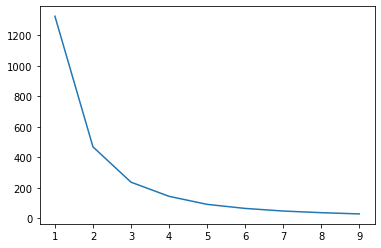

In [28]:
quantidade_k(df_dados2012, "Income composition of resources", "Schooling")

<AxesSubplot:xlabel='Income composition of resources', ylabel='Schooling'>

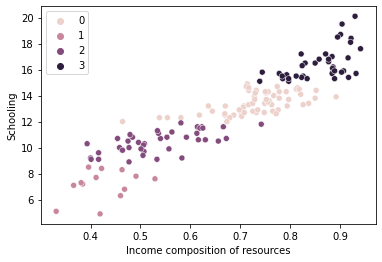

In [29]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_dados2012[["Income composition of resources", "Schooling"]])
sns.scatterplot(data = df_dados2012, x = "Income composition of resources", y = "Schooling", hue = kmeans.labels_)

In [30]:
df_dados2012[["Income composition of resources", "Schooling"]].corr()

,Income composition of resources,Schooling
Income composition of resources,1.000000,0.915567
Schooling,0.915567,1.000000


Analisando os países sem uma separação em grupos por IDH, este fator acaba influenciando nas outras variáveis. Observando o gráfico de escolaridade e expectativa de vida, fica evidente a correlação entre essas duas variáveis. Entretanto, isso acontece por causa do IDH; países com um IDH maior possuem um maior nível de escolaridade, e países que possuem maior IDH possuem maior expectativa de vida. Com isso, pode existir correlação entre expectativa de vida e escolaridade, mas pode não haver causalidade.

## **Para uma análise sem ter o IDH influenciando na correlação das variáveis, foi feita uma separação dos países por IDH:**
#### - Grupo 1: Países com IDH até 0.600;
#### - Grupo 2: Países com IDH entre 0.601 e 0.800;
#### - Grupo 3: Países com IDH acima de 0.800.

## 5.RESPONDENDO AS PERGUNTAS 
**Nessa seção visualizaremos os dados pertinentes de cada pergunta de forma intuitiva como também o resultados que obtivemos utilizando agrupamento com o método K-means**

In [31]:
def name_countries_classificated(df:pd.DataFrame, label:np.ndarray) -> pd.DataFrame:
    df['classificacao'] = kmeans.labels_
    dfs_ = [
        df.query(f'classificacao == {unique_label}')['Country']\
            .reset_index(drop=True)\
            .rename(f'{unique_label}', axis=0)
        for unique_label in np.unique(label)
    ]

    return pd.concat(dfs_, axis=1)

A função name_countries_classificated foi definida para verificar quais países tinham sido classificados em cada cluster pelo algoritmo K-Means. O vetor kmeans.labels_, por possuir o mesmo tamanho do DataFrame, foi atribuído a coluna "classificacao". 
Com isso foi possível realizar uma query para selecionar apenas os países que possuem determinada classificação numérica, o índice do dataset original foi removido e a coluna foi renomeada para corresponder ao label do K-Means. 
Ao fim, os n dataframes armazenados na lista são concatenados em colunas para retornar apenas 1 DataFrame com todos os países classificados.

Abaixo está o dataframe que representa os países com IDH até 0.600.

In [32]:
df_0_6 = df_dados2012.copy()
df_0_6 = df_0_6[df_0_6["Income composition of resources"] <= 0.600]

O dataframe "df_alcool06" possui os dados de consumo de álcool dos países com IDH até 0.600 sem a presença de valores "NaN". Este procedimento foi repetido nos outros dataframes, tendo em vista que o algoritmo KMeans não trabalha com valores "NaN".

In [33]:
df_alcool06 = df_0_6.dropna(subset = ["Alcohol"])

Abaixo está o dataframe que representa os países com IDH entre 0.601 e 0.800.

In [34]:
df_6_8 = df_dados2012.copy()
df_6_8 = df_6_8[df_6_8["Income composition of resources"] > 0.600]
df_6_8 = df_6_8[df_6_8["Income composition of resources"] <= 0.800]

In [35]:
df_alcool68 = df_6_8.dropna(subset = ["Alcohol"])

Abaixo está o dataframe que representa os países com IDH acima de 0.800.

In [36]:
df_8 = df_dados2012.copy()
df_8 = df_8[df_8["Income composition of resources"] > 0.800]

In [37]:
df_alcool8 = df_8.dropna(subset = ["Alcohol"])

- O procedimento padrão para responder todas as perguntas foi o seguinte:
1. Utilizar a função "quantidade_k" para encontrar o valor ideal de k;
2. Agrupar os dados utilizando o algoritmo KMeans e gerar o gráfico de dispersão agrupado (as cores representam os grupos, no parâmetro "hue" foi utilizado o 'kmeans.labels_', responsável pelo agrupamento);
3. Utilizar a função "name_countries_classificated" para gerar um dataframe com os países separados pelos grupos formados;
4. Gerar a correlação entre os fatores analisados para chegar as conclusões.

# 1. Qual a relação existente entre o consumo de álcool e a expectativa de vida?

## Países com IDH até 0.600



C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


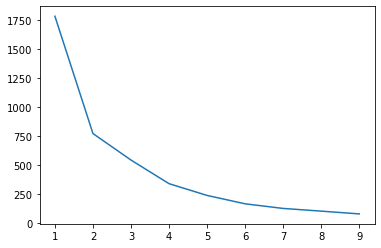

In [38]:
quantidade_k(df_alcool06, "Alcohol", "Life expectancy ")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Alcohol'>

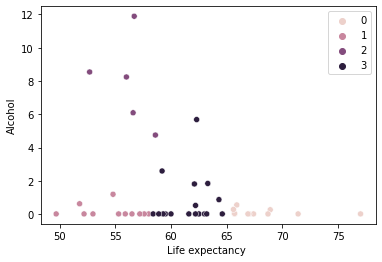

In [39]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_alcool06[["Alcohol", "Life expectancy "]])
sns.scatterplot(data = df_alcool06, x = "Life expectancy ", y = "Alcohol", hue = kmeans.labels_)

In [40]:
df_ = df_alcool06.copy()
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Bangladesh,Burundi,Angola,Afghanistan
1,Bhutan,Cameroon,Burkina Faso,Benin
2,Cambodia,Central African Republic,Equatorial Guinea,Comoros
3,Kiribati,Chad,Nigeria,Djibouti
4,Liberia,Guinea-Bissau,Zimbabwe,Ethiopia
5,Myanmar,Lesotho,NaN,Ghana
6,Nepal,Malawi,NaN,Guinea
7,Pakistan,Mali,NaN,Haiti
8,Sao Tome and Principe,Mozambique,NaN,Kenya
9,Senegal,Sierra Leone,NaN,Madagascar


Abaixo está a matriz de correlação entre os fatores analisados:

In [41]:
df_alcool06[["Alcohol", "Life expectancy "]].corr()

,Alcohol,Life expectancy
Alcohol,1.0000,-0.2935
Life expectancy,-0.2935,1.0000


Muitos dos países que compõem esse grupo são muçulmanos e, por motivos religiosos, não consomem álcool. Há uma fraca correlação negativa entre o consumo de álcool e a expectativa de vida.

## Países com IDH entre 0.601 e 0.800

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


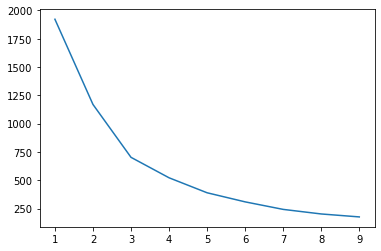

In [42]:
quantidade_k(df_alcool68, "Alcohol", "Life expectancy ")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Alcohol'>

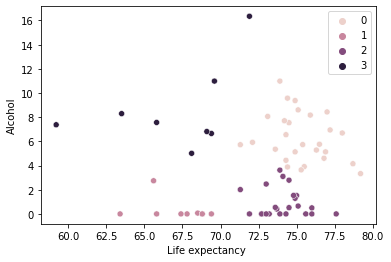

In [43]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_alcool68[["Alcohol", "Life expectancy "]])
sns.scatterplot(data = df_alcool68, x = "Life expectancy ", y = "Alcohol", hue = kmeans.labels_)

In [44]:
df_ = df_alcool68.copy()
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Albania,Botswana,Algeria,Belarus
1,Antigua and Barbuda,Fiji,Azerbaijan,Belize
2,Armenia,Indonesia,Cabo Verde,Gabon
3,Barbados,Mongolia,El Salvador,Guyana
4,Bosnia and Herzegovina,Namibia,Guatemala,Kazakhstan
5,Brazil,Tajikistan,Honduras,Philippines
6,Bulgaria,Timor-Leste,Iraq,Russian Federation
7,China,Turkmenistan,Jordan,South Africa
8,Colombia,Uzbekistan,Kuwait,NaN
9,Costa Rica,NaN,Lebanon,NaN


In [45]:
df_alcool68[["Alcohol", "Life expectancy "]].corr()

,Alcohol,Life expectancy
Alcohol,1.000000,0.044254
Life expectancy,0.044254,1.000000


Existe uma correlação muito fraca entre a expectativa de vida e o consumo de álcool. Mais uma vez, há a presença de países onde não há consumo de álcool por questões religiosas.

## Países com IDH superior a 0.800

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


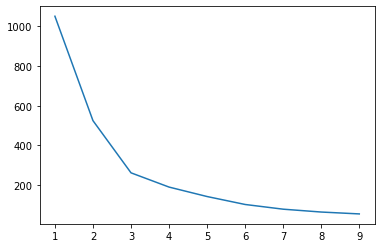

In [46]:
quantidade_k(df_alcool8, "Alcohol", "Life expectancy ")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Alcohol'>

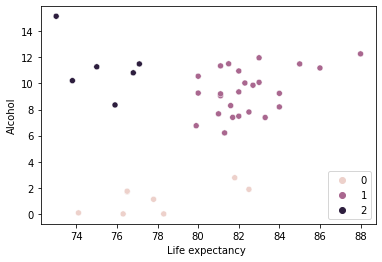

In [47]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_alcool8[["Alcohol", "Life expectancy "]])
sns.scatterplot(data = df_alcool8, x = "Life expectancy ", y = "Alcohol", hue = kmeans.labels_)

In [48]:
df_ = df_alcool8.copy()
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Bahrain,Australia,Argentina
1,Brunei Darussalam,Austria,Croatia
2,Estonia,Belgium,Hungary
3,Israel,Canada,Latvia
4,Qatar,Chile,Lithuania
5,Saudi Arabia,Cyprus,Poland
6,Singapore,Denmark,NaN
7,United Arab Emirates,Finland,NaN
8,NaN,France,NaN
9,NaN,Germany,NaN


In [49]:
df_alcool8[["Alcohol", "Life expectancy "]].corr()

,Alcohol,Life expectancy
Alcohol,1.000000,0.271426
Life expectancy,0.271426,1.000000


Há uma correlação fraca entre consumo de álcool e expectativa de vida.

## -*Resultados obtidos*


- Países com IDH até 0.600: Muitos dos países que compõem esse grupo são muçulmanos e, por motivos religiosos, não consomem álcool. Há uma fraca correlação negativa entre o consumo de álcool e a expectativa de vida.
- Países com IDH entre 0.601 e 0.800: Existe uma correlação muito fraca entre consumo de álcool e expectativa de vida 
- Países com IDH acima de 0.800: Há uma correlação fraca entre consumo de álcool e expectativa de vida. 

# 2.Países com maior escolaridade possuem maior expectativa de vida?

## Países com IDH até 0.600

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


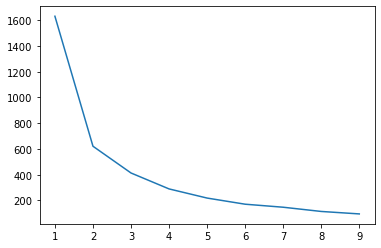

In [50]:
quantidade_k(df_0_6, "Life expectancy ", "Schooling")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

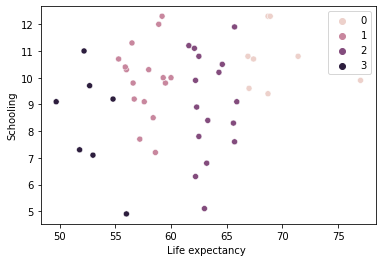

In [51]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_0_6[["Life expectancy ", "Schooling"]])
sns.scatterplot(data = df_0_6, x = "Life expectancy ", y = "Schooling", hue = kmeans.labels_)

In [52]:
df_ = df_0_6.copy()
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Bangladesh,Afghanistan,Comoros,Central African Republic
1,Bhutan,Angola,Djibouti,Chad
2,Cambodia,Benin,Ethiopia,Lesotho
3,Liberia,Burkina Faso,Ghana,Mozambique
4,Nepal,Burundi,Haiti,Nigeria
5,Sao Tome and Principe,Cameroon,Kenya,Sierra Leone
6,Solomon Islands,Equatorial Guinea,Kiribati,South Sudan
7,Vanuatu,Guinea,Madagascar,NaN
8,NaN,Guinea-Bissau,Mauritania,NaN
9,NaN,Malawi,Myanmar,NaN


In [53]:
df_0_6[["Life expectancy ", "Schooling"]].corr()

,Life expectancy,Schooling
Life expectancy,1.000000,0.197908
Schooling,0.197908,1.000000


Existe uma correlação muito fraca entre a escolaridade e a expectativa de vida. 

## Países com IDH entre 0.601 e 0.800

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


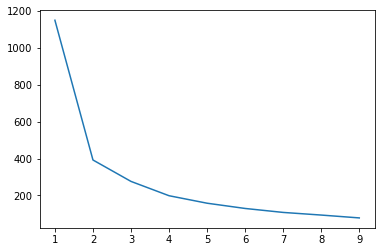

In [54]:
quantidade_k(df_6_8, "Life expectancy ", "Schooling")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

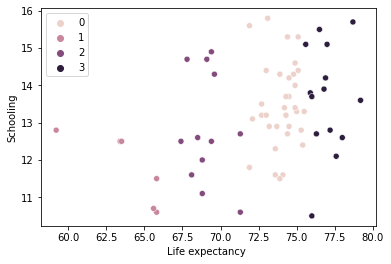

In [55]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_6_8[["Life expectancy ", "Schooling"]])
sns.scatterplot(data = df_6_8, x = "Life expectancy ", y = "Schooling", hue = kmeans.labels_)

In [56]:
df_ = df_6_8.copy()
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Algeria,Botswana,Belize,Albania
1,Armenia,Gabon,Fiji,Antigua and Barbuda
2,Azerbaijan,Guyana,Guatemala,Bosnia and Herzegovina
3,Barbados,Namibia,Indonesia,Costa Rica
4,Belarus,South Africa,Kazakhstan,Cuba
5,Brazil,Turkmenistan,Mongolia,Iraq
6,Bulgaria,NaN,Philippines,Maldives
7,Cabo Verde,NaN,Russian Federation,Mexico
8,China,NaN,Suriname,Montenegro
9,Colombia,NaN,Tajikistan,Oman


In [57]:
df_6_8[["Life expectancy ", "Schooling"]].corr()

,Life expectancy,Schooling
Life expectancy,1.000000,0.349194
Schooling,0.349194,1.000000


Nesse grupo de países, existe uma correlação fraca entre a escolaridade e a expectativa de vida.

## Países com IDH acima de 0.800

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


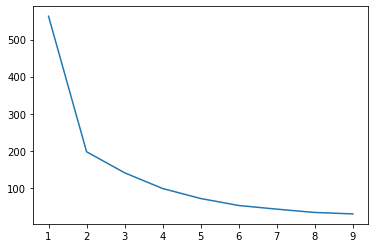

In [58]:
quantidade_k(df_8, "Life expectancy ", "Schooling")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

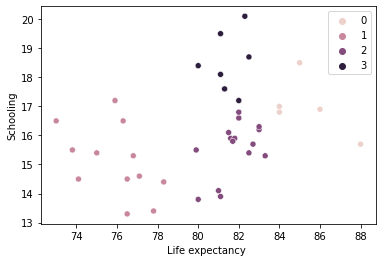

In [59]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_8[["Life expectancy ", "Schooling"]])
sns.scatterplot(data = df_8, x = "Life expectancy ", y = "Schooling", hue = kmeans.labels_)

In [60]:
df_ = df_8.copy()
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Austria,Argentina,Belgium,Australia
1,Finland,Bahrain,Canada,Denmark
2,Germany,Brunei Darussalam,Chile,Iceland
3,Greece,Croatia,Cyprus,Netherlands
4,Ireland,Estonia,France,New Zealand
5,NaN,Hungary,Israel,Norway
6,NaN,Latvia,Italy,Spain
7,NaN,Lithuania,Japan,NaN
8,NaN,Poland,Luxembourg,NaN
9,NaN,Qatar,Malta,NaN


In [61]:
df_8[["Life expectancy ", "Schooling"]].corr()

,Life expectancy,Schooling
Life expectancy,1.000000,0.356389
Schooling,0.356389,1.000000


Há uma correlação fraca entre escolaridade e expectativa de vida.

## -*Resultados obtidos*

- Países com IDH até 0.600: Existe uma correlação muito fraca entre a escolaridade e a expectativa de vida.  
- Países com IDH entre 0.601 e 0.800: Nesse grupo de países, existe uma correlação fraca entre a escolaridade e a expectativa de vida. 
- Países com IDH acima de 0.800: Há uma correlação fraca entre escolaridade e expectativa de vida. 
- Conclusão: De um modo geral, existe uma correlação fraca entre escolaridade e expectativa de vida, mas não é algo revelante o suficiente para realmente influenciar na expectativa de vida de uma população.

É válido ressaltar que, analisando o gráfico sem separação por IDH, existe uma correlação positiva bastante aparente entre a escolaridade e a expectativa de vida. Isso se deve ao fato de que países com um maior nível de escolaridade também possuem um IDH mais elevado, e o IDH elevado resulta em uma maior expectativa de vida. É o principal fator relacionado a expectativa de vida nos dados analisados.

# 3.Existe uma relação entre o PIB per capita e os gastos governamentais com saúde?

## Países com IDH até 0.600

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


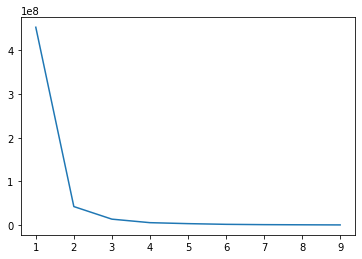

In [62]:
quantidade_k(df_0_6, "Total expenditure", "GDP")

<AxesSubplot:xlabel='Total expenditure', ylabel='GDP'>

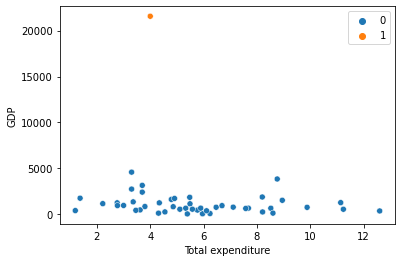

In [63]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_0_6[["Total expenditure", "GDP"]])
sns.scatterplot(data = df_0_6, x = "Total expenditure", y = "GDP", hue = kmeans.labels_)

In [64]:
df_ = df_0_6.copy()
name_countries_classificated(df_, kmeans.labels_)

,0,1
0,Afghanistan,Equatorial Guinea
1,Angola,NaN
2,Bangladesh,NaN
3,Benin,NaN
4,Bhutan,NaN
5,Burkina Faso,NaN
6,Burundi,NaN
7,Cambodia,NaN
8,Cameroon,NaN
9,Central African Republic,NaN


In [65]:
df_0_6[["Total expenditure", "GDP"]].corr()

,Total expenditure,GDP
Total expenditure,1.000000,-0.147358
GDP,-0.147358,1.000000


Há uma correlação negativa muito fraca entre os gastos governamentais e o PIB per capita.

## Países com IDH entre 0.601 e 0.800

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


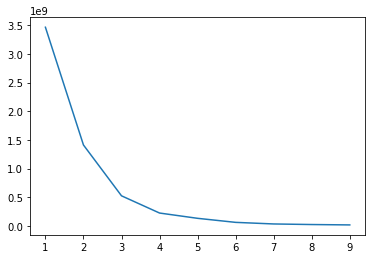

In [66]:
quantidade_k(df_6_8, "Total expenditure", "GDP")

<AxesSubplot:xlabel='Total expenditure', ylabel='GDP'>

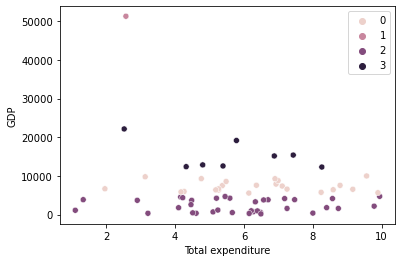

In [67]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_6_8[["Total expenditure", "GDP"]])
sns.scatterplot(data = df_6_8, x = "Total expenditure", y = "GDP", hue = kmeans.labels_)

In [68]:
df_ = df_6_8.copy()
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Algeria,Kuwait,Albania,Antigua and Barbuda
1,Azerbaijan,NaN,Armenia,Barbados
2,Bulgaria,NaN,Belarus,Brazil
3,China,NaN,Belize,Kazakhstan
4,Colombia,NaN,Bosnia and Herzegovina,Oman
5,Costa Rica,NaN,Botswana,Russian Federation
6,Cuba,NaN,Cabo Verde,Seychelles
7,Dominican Republic,NaN,Ecuador,Trinidad and Tobago
8,Gabon,NaN,El Salvador,NaN
9,Grenada,NaN,Fiji,NaN


In [69]:
df_6_8[["Total expenditure", "GDP"]].corr()

,Total expenditure,GDP
Total expenditure,1.000000,-0.168716
GDP,-0.168716,1.000000


Há uma correlação negativa muito fraca entre os gastos governamentais e o PIB per capita.

## Países com IDH acima de 0.800

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


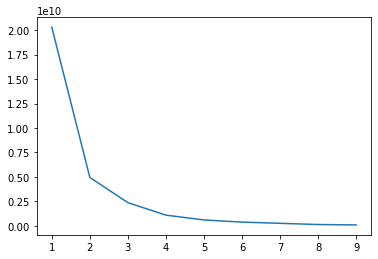

In [70]:
quantidade_k(df_8, "Total expenditure", "GDP")

<AxesSubplot:xlabel='Total expenditure', ylabel='GDP'>

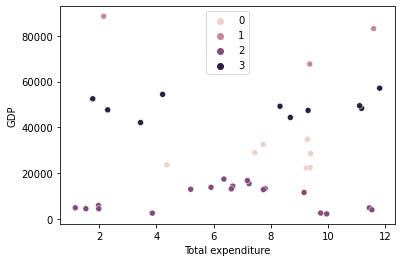

In [71]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_8[["Total expenditure", "GDP"]])
sns.scatterplot(data = df_8, x = "Total expenditure", y = "GDP", hue = kmeans.labels_)

In [72]:
df_ = df_8.copy()
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Bahrain,Australia,Argentina,Austria
1,Cyprus,Qatar,Belgium,Brunei Darussalam
2,Greece,Switzerland,Chile,Canada
3,Israel,NaN,Croatia,Finland
4,Italy,NaN,Denmark,Iceland
5,Slovenia,NaN,Estonia,Ireland
6,Spain,NaN,France,Netherlands
7,NaN,NaN,Germany,Singapore
8,NaN,NaN,Hungary,Sweden
9,NaN,NaN,Japan,United Arab Emirates


In [73]:
df_8[["Total expenditure", "GDP"]].corr()

,Total expenditure,GDP
Total expenditure,1.00000,0.11795
GDP,0.11795,1.00000


Existe uma correlação muito fraca entre gastos governamentais e PIB per capita.

## -*Resultados obtidos*

- Países com IDH até 0.600: Há uma correlação negativa muito fraca entre os gastos governamentais e o PIB per capita.
- Países com IDH entre 0.601 e 0.800: Há uma correlação negativa muito fraca entre gastos governamentais e o PIB per capita.
- Países com IDH acima de 0.800: Existe uma correlação muito fraca entre gastos governamentais e PIB per capita.

# 4.Existe relação entre escolaridade e gastos pessoais com saúde?

## Países com IDH até 0.600

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


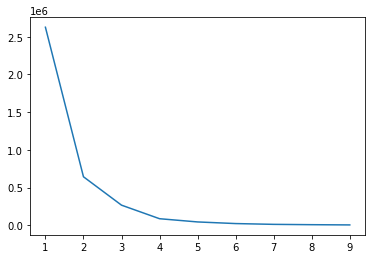

In [74]:
quantidade_k(df_0_6, "percentage expenditure", "Schooling")

<AxesSubplot:xlabel='percentage expenditure', ylabel='Schooling'>

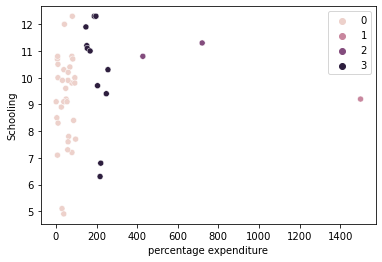

In [75]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_0_6[["percentage expenditure", "Schooling"]])
sns.scatterplot(data = df_0_6, x = "percentage expenditure", y = "Schooling", hue = kmeans.labels_)

In [76]:
df_ = df_0_6.copy()
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Afghanistan,Equatorial Guinea,Swaziland,Angola
1,Bangladesh,NaN,Vanuatu,Bhutan
2,Benin,NaN,NaN,Djibouti
3,Burkina Faso,NaN,NaN,Ghana
4,Burundi,NaN,NaN,Kenya
5,Cambodia,NaN,NaN,Kiribati
6,Cameroon,NaN,NaN,Lesotho
7,Central African Republic,NaN,NaN,Nigeria
8,Chad,NaN,NaN,Solomon Islands
9,Comoros,NaN,NaN,Sudan


In [77]:
df_0_6[["percentage expenditure", "Schooling"]].corr()

,percentage expenditure,Schooling
percentage expenditure,1.000000,0.108859
Schooling,0.108859,1.000000


Existe uma correlação muito fraca entre escolaridade e os gastos pessoais com saúde.

## Países com IDH entre 0.601 e 0.800

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


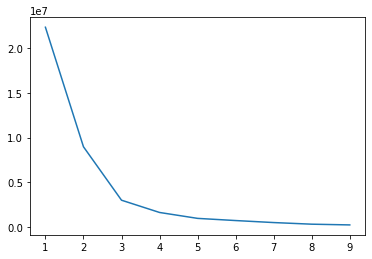

In [78]:
quantidade_k(df_6_8, "percentage expenditure", "Schooling")

<AxesSubplot:xlabel='percentage expenditure', ylabel='Schooling'>

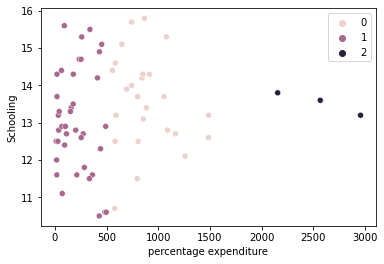

In [79]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_6_8[["percentage expenditure", "Schooling"]])
sns.scatterplot(data = df_6_8, x = "percentage expenditure", y = "Schooling", hue = kmeans.labels_)

In [80]:
df_ = df_6_8.copy()
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Algeria,Albania,Antigua and Barbuda
1,Belize,Armenia,Costa Rica
2,Bosnia and Herzegovina,Azerbaijan,Kuwait
3,Brazil,Barbados,NaN
4,Bulgaria,Belarus,NaN
5,Colombia,Botswana,NaN
6,Cuba,Cabo Verde,NaN
7,Dominican Republic,China,NaN
8,El Salvador,Ecuador,NaN
9,Gabon,Fiji,NaN


In [81]:
df_6_8[["percentage expenditure", "Schooling"]].corr()

,percentage expenditure,Schooling
percentage expenditure,1.000000,0.094611
Schooling,0.094611,1.000000


Existe uma correlação muito fraca entre escolaridade e os gastos pessoais com saúde.

## Países com IDH acima de 0.800

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


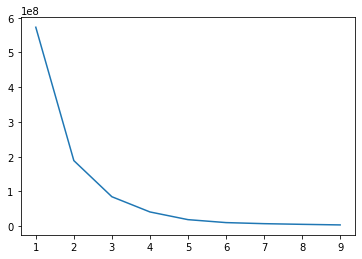

In [82]:
quantidade_k(df_8, "percentage expenditure", "Schooling")

<AxesSubplot:xlabel='percentage expenditure', ylabel='Schooling'>

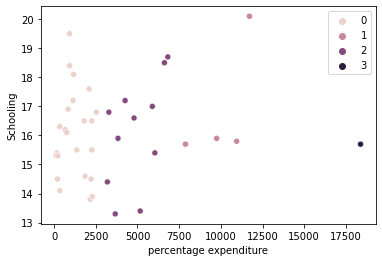

In [83]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_8[["percentage expenditure", "Schooling"]])
sns.scatterplot(data = df_8, x = "percentage expenditure", y = "Schooling", hue = kmeans.labels_)

In [84]:
df_ = df_8.copy()
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Argentina,Australia,Brunei Darussalam,Switzerland
1,Bahrain,Austria,Finland,NaN
2,Belgium,Canada,Iceland,NaN
3,Chile,Sweden,Ireland,NaN
4,Croatia,NaN,Israel,NaN
5,Cyprus,NaN,Italy,NaN
6,Denmark,NaN,Qatar,NaN
7,Estonia,NaN,Singapore,NaN
8,France,NaN,Slovenia,NaN
9,Germany,NaN,Spain,NaN


In [85]:
df_8[["percentage expenditure", "Schooling"]].corr()

,percentage expenditure,Schooling
percentage expenditure,1.000000,0.156661
Schooling,0.156661,1.000000


Existe uma correlação muito fraca entre escolaridade e os gastos pessoais com saúde.

## -*Resultados obtidos*

- Países com IDH até 0.600: Existe uma correlação muito fraca entre escolaridade e os gastos pessoais com saúde.
- Países com IDH entre 0.601 e 0.800: Existe uma correlação muito fraca entre escolaridade e os gastos pessoais com saúde.
- Países com IDH acima de 0.800: Existe uma correlação muito fraca entre escolaridade e os gastos pessoais com saúde.

# 5.Existe relação entre escolaridade e consumo de álcool?

## Países com IDH até 0.600

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


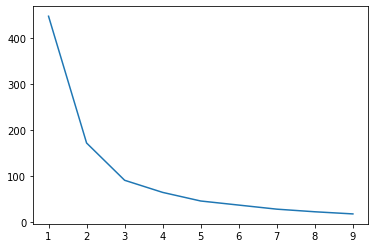

In [86]:
quantidade_k(df_alcool06, "Schooling", "Alcohol")

<AxesSubplot:xlabel='Alcohol', ylabel='Schooling'>

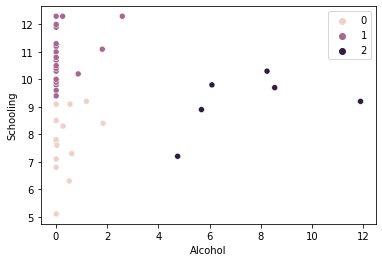

In [87]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_alcool06[["Schooling", "Alcohol"]])
sns.scatterplot(data = df_alcool06, x = "Alcohol", y = "Schooling", hue = kmeans.labels_)

In [88]:
df_ = df_alcool06.copy()
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Central African Republic,Afghanistan,Angola
1,Chad,Bangladesh,Burkina Faso
2,Djibouti,Benin,Equatorial Guinea
3,Ethiopia,Bhutan,Haiti
4,Guinea,Burundi,Nigeria
5,Guinea-Bissau,Cambodia,Zimbabwe
6,Mali,Cameroon,NaN
7,Mauritania,Comoros,NaN
8,Mozambique,Ghana,NaN
9,Myanmar,Kenya,NaN


In [89]:
df_alcool06[["Schooling", "Alcohol"]].corr()

,Schooling,Alcohol
Schooling,1.000000,-0.039555
Alcohol,-0.039555,1.000000


Existe uma correlação negativa muito fraca entre escolaridade e consumo de álcool.

## Países com IDH entre 0.601 e 0.800

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


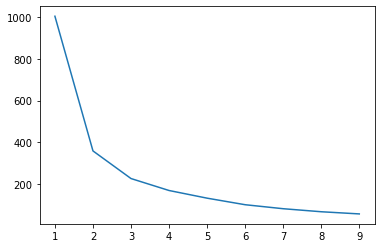

In [90]:
quantidade_k(df_alcool68, "Schooling", "Alcohol")

<AxesSubplot:xlabel='Alcohol', ylabel='Schooling'>

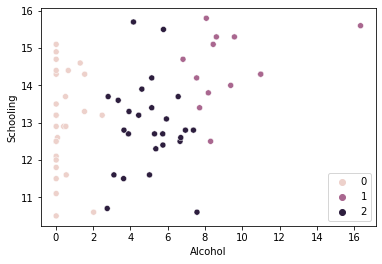

In [91]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_alcool68[["Schooling", "Alcohol"]])
sns.scatterplot(data = df_alcool68, x = "Alcohol", y = "Schooling", hue = kmeans.labels_)

In [92]:
df_ = df_alcool68.copy()
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Algeria,Antigua and Barbuda,Albania
1,Azerbaijan,Barbados,Armenia
2,Botswana,Belarus,Belize
3,Cabo Verde,Brazil,Bosnia and Herzegovina
4,El Salvador,Bulgaria,China
5,Fiji,Gabon,Colombia
6,Guatemala,Georgia,Costa Rica
7,Indonesia,Grenada,Cuba
8,Iraq,Kazakhstan,Dominican Republic
9,Jordan,Romania,Ecuador


In [93]:
df_alcool68[["Schooling", "Alcohol"]].corr()

,Schooling,Alcohol
Schooling,1.000000,0.335941
Alcohol,0.335941,1.000000


Existe uma correlação fraca entre escolaridade e consumo de álcool.

## Países com IDH acima de 0.800

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


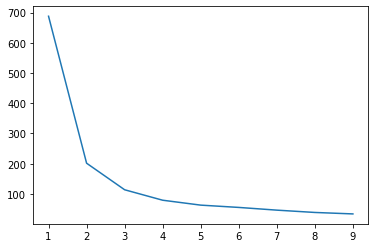

In [94]:
quantidade_k(df_alcool8, "Schooling", "Alcohol")

<AxesSubplot:xlabel='Alcohol', ylabel='Schooling'>

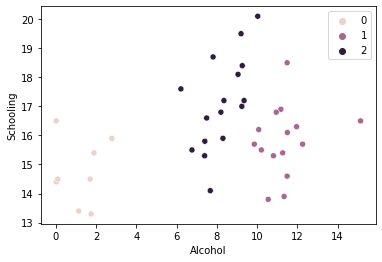

In [95]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_alcool8[["Schooling", "Alcohol"]])
sns.scatterplot(data = df_alcool8, x = "Alcohol", y = "Schooling", hue = kmeans.labels_)

In [96]:
df_ = df_alcool8.copy()
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Bahrain,Austria,Argentina
1,Brunei Darussalam,Belgium,Australia
2,Estonia,Croatia,Canada
3,Israel,Cyprus,Chile
4,Qatar,France,Denmark
5,Saudi Arabia,Germany,Finland
6,Singapore,Hungary,Greece
7,United Arab Emirates,Ireland,Iceland
8,NaN,Latvia,Italy
9,NaN,Lithuania,Japan


In [97]:
df_alcool8[["Schooling", "Alcohol"]].corr()

,Schooling,Alcohol
Schooling,1.00000,0.34435
Alcohol,0.34435,1.00000


Há uma correlação fraca entre consumo de álcool e escolaridade.

## -*Resultados obtidos*

- Países com IDH até 0.600: Existe uma correlação negativa muito fraca entre escolaridade e consumo de álcool.
- Países com IDH entre 0.601 e 0.800: Existe uma correlação fraca entre a escolaridade e o consumo de álcool.
- Países com IDH acima de 0.800: Há uma correlação fraca entre escolaridade e consumo de álcool.
- Conclusão: Existe uma correlação fraca entre escolaridade e consumo de álcool presente em países que não são predominantemente muçulmanos.

# CONCLUSÕES FINAIS


## Limitações, trabalhos futuros e melhorias que podem ser feitas

### Limitações
1. O dataset possui alguns países com dados inválidos ou em falta. Algumas unidades de medida não estão bem informadas.
2. Ao analisar o consumo de álcool, muitos países possuem um consumo próximo de zero por se tratarem de países muçulmanos, dificultando a correlação das perguntas 1 e 5.
3. Não é possível fazer uma correlação generalizada dos fatores, pois o IDH influencia nessa correlação.

### Trabalhos futuros
Procurar outros datasets que permitam uma análise de outros fatores, como fatores relacionados a imunização e fatores relacionados a mortalidade.

### Melhorias que podem ser feitas

1. Gerar gráficos de boxplot mais precisos, analisando os anos em que os dados do dataset são validados.
2. Fazer uma análise de forma paralela à países muçulmanos e não muçulmanos no que tange às correlações envolvendo álcool.